<a href="https://colab.research.google.com/github/MSamhitha/Loan-Repayment-Prediction-Using-Machine-Learning/blob/main/loan_repayment_Samhitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,KFold
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

df = pd.read_csv("/content/drive/MyDrive/modified_data.csv")
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1             0.0   
1  14.29   707        2760.000000      33623        76.7             0.0   
2  11.63   682        4710.000000       3511        25.6             1.0   
3   8.10   712        2699.958333      33667        73.2             1.0   
4  14.97   667        4066.000000       4740        39.5             0.0   

   delinq.2yrs  pub.rec  not.fully.paid  
0          0.0        0               0  
1          0.0        0               0  
2          0.0        0               0  
3          0.0        0               0  
4          1.0        0               0

In [ ]:
columns_to_exclude = ['credit.policy', 'purpose','not.fully.paid']
df2 = df.drop(columns_to_exclude, axis=1)

In [ ]:
column = 'dti'

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df2[column].quantile(0.25)
Q3 = df2[column].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace values below the lower_bound with the median value
df2[column] = np.where(
    df2[column] < lower_bound,
    df2[column].median(),
    df2[column]
)


In [ ]:
df2.describe()

int.rate  installment  log.annual.inc          dti         fico  \
count  9578.000000  9578.000000     9578.000000  9578.000000  9578.000000   
mean      0.122640   319.089413       10.932117    12.606679   710.846314   
std       0.026847   207.071301        0.614813     6.883970    37.970537   
min       0.060000    15.670000        7.547502     0.000000   612.000000   
25%       0.103900   163.770000       10.558414     7.212500   682.000000   
50%       0.122100   268.950000       10.928884    12.665000   707.000000   
75%       0.140700   432.762500       11.291293    17.950000   737.000000   
max       0.216400   940.140000       14.528354    29.960000   827.000000   

       days.with.cr.line     revol.bal   revol.util  inq.last.6mths  \
count        9578.000000  9.578000e+03  9578.000000     9578.000000   
mean         4212.115425  1.691396e+04    46.799236        1.221099   
std          1925.671163  3.375619e+04    29.014417        1.322694   
min           178.958333  0.000000e+00     0.000000        0.000000   
25%          2820.000000  3.187000e+03    22.600000        0.000000   
50%          4139.958333  8.596000e+03    46.300000        1.000000   
75%          5375.989583  1.824950e+04    70.900000        2.000000   
max          9420.000000  1.207359e+06   119.000000        5.000000   

       delinq.2yrs      pub.rec  
count  9578.000000  9578.000000  
mean      0.086866     0.062122  
std       0.281653     0.262126  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     5.000000

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

skewness = df2.apply(skew)
kurtosis = df2.apply(kurtosis)

print("Skewness:")
print(skewness)

print("Kurtosis:")
print(kurtosis)



Skewness:
int.rate              0.164394
installment           0.912380
log.annual.inc        0.028664
dti                   0.023937
fico                  0.471186
days.with.cr.line     0.434183
revol.bal            11.159310
revol.util            0.059976
inq.last.6mths        1.085883
delinq.2yrs           2.933794
pub.rec               5.125632
dtype: float64
Kurtosis:
int.rate              -0.224833
installment            0.137209
log.annual.inc         1.607538
dti                   -0.900512
fico                  -0.422718
days.with.cr.line     -0.239300
revol.bal            259.519049
revol.util            -1.116511
inq.last.6mths         0.489196
delinq.2yrs            6.607148
pub.rec               38.760139
dtype: float64


In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'df' and the columns of interest are 'purpose' and 'not.fully.paid'
class_frequency = df.groupby('purpose')['not.fully.paid'].value_counts().unstack().fillna(0)

print("Class Frequency:")
print(class_frequency)


Class Frequency:
not.fully.paid         0    1
purpose                      
all_other           1944  387
credit_card         1116  146
debt_consolidation  3354  603
educational          274   69
home_improvement     522  107
major_purchase       388   49
small_business       447  172


In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'df' and the columns of interest are 'credit.policy' and 'not.fully.paid'
class_frequency = df.groupby('credit.policy')['not.fully.paid'].value_counts().unstack().fillna(0)

print("Class Frequency:")
print(class_frequency)


Class Frequency:
not.fully.paid     0     1
credit.policy             
0               1349   519
1               6696  1014


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking null values
df.isnull().sum()


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

no null values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

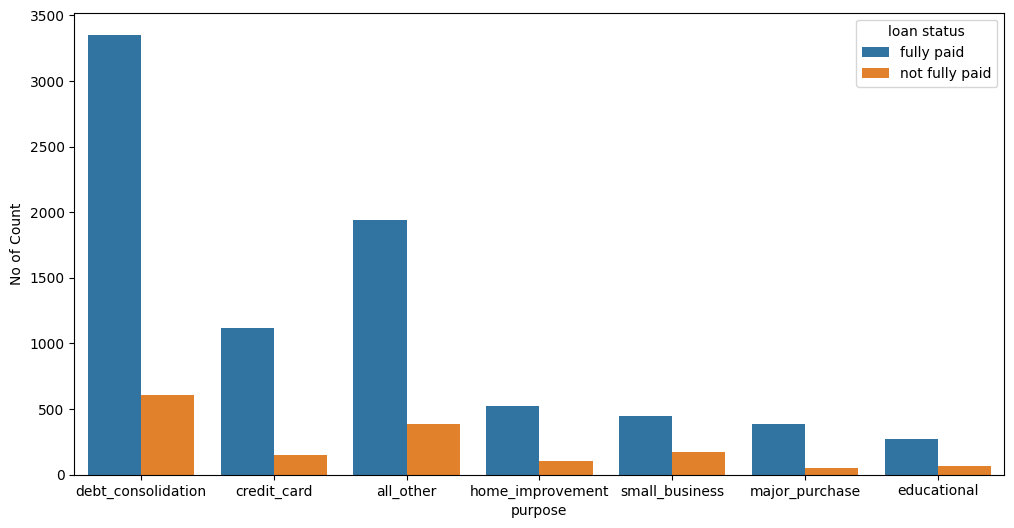

In [ ]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.ylabel('No of Count')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["fully paid", "not fully paid"], title='loan status', loc='upper right')

plt.savefig('purpose.png')
files.download('purpose.png')


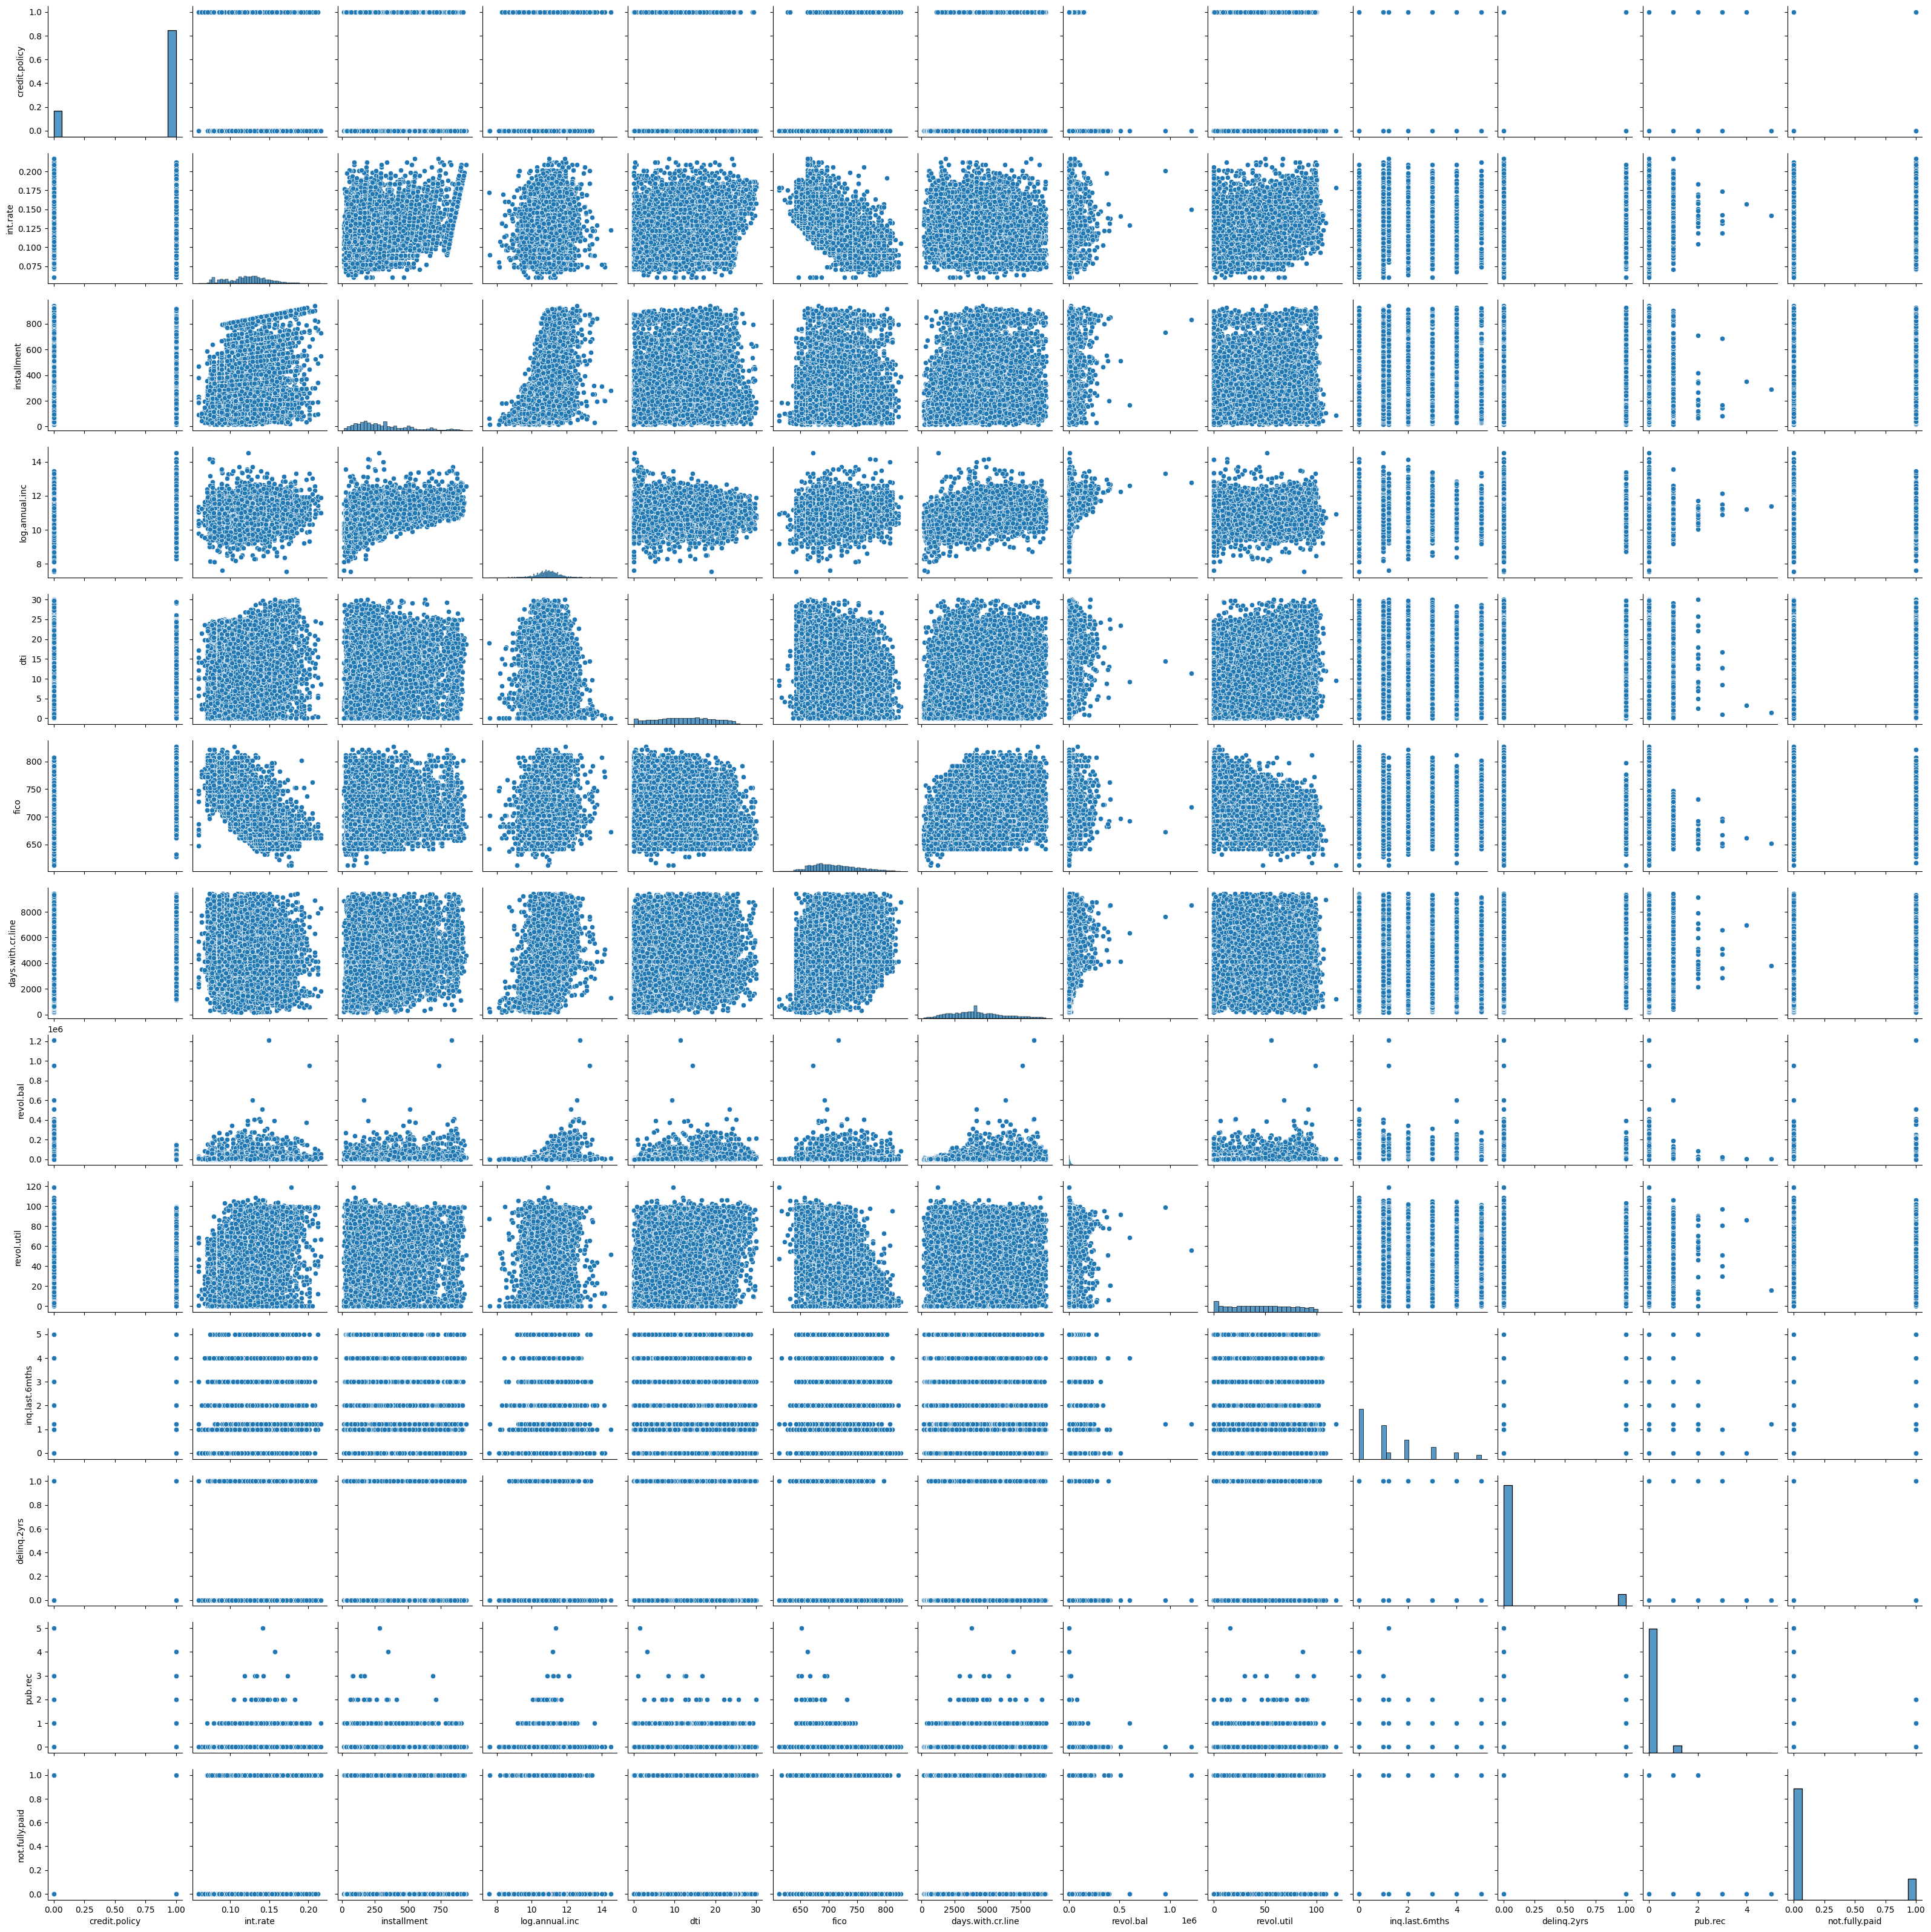

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the pair plot
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a pair plot
sns.pairplot(numerical_columns)
plt.show()


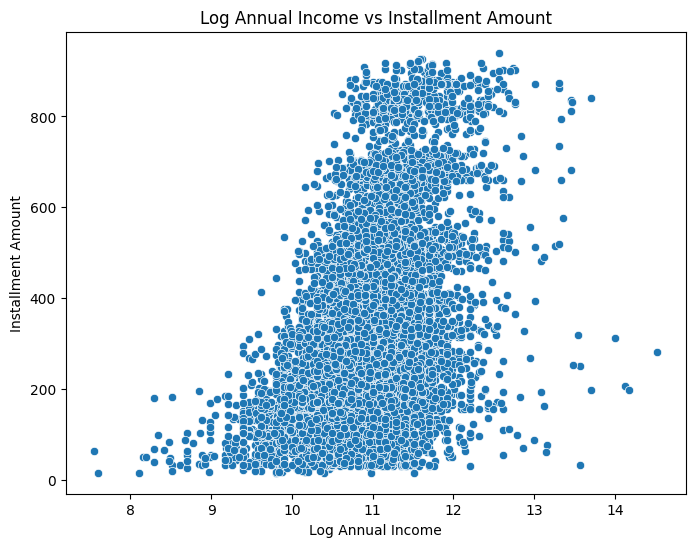

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for log.annual.inc vs installment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log.annual.inc', y='installment', data=df)
plt.xlabel('Log Annual Income')
plt.ylabel('Installment Amount')
plt.title('Log Annual Income vs Installment Amount')
plt.show()


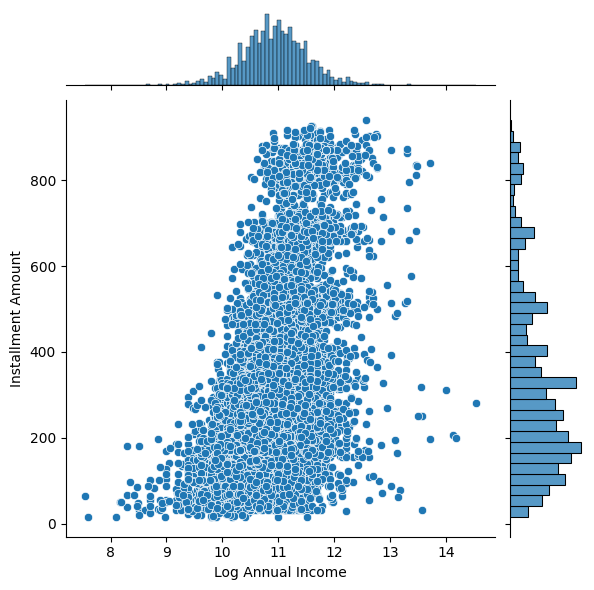

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot for log.annual.inc vs installment
sns.jointplot(x='log.annual.inc', y='installment', data=df, kind='scatter')
plt.xlabel('Log Annual Income')
plt.ylabel('Installment Amount')
plt.savefig('scatterplot_log_annual_inc_vs_installment.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

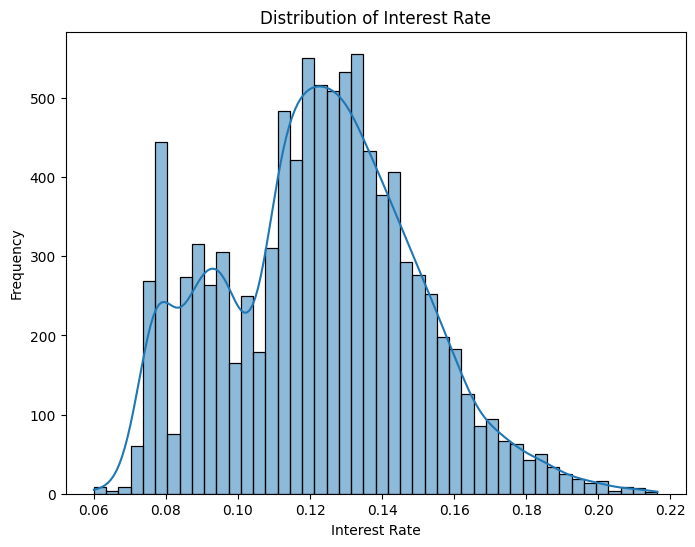

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(8, 6))
sns.histplot(df['int.rate'], kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rate')

# Save the plot as an image
plt.savefig('interest_rate_distribution.png')
files.download('interest_rate_distribution.png')




The observation that the frequency of interest rates starts low at 6%, increases up to 15% with a frequency of 500, and then decreases suggests some valuable insights for lenders:

Preferred Interest Rate Range: The increase in frequency from 6% to 15% indicates that there is a significant demand or preference among borrowers for interest rates within this range. Lenders can consider offering loan products at these rates to cater to the needs of borrowers who are more inclined towards this range. It suggests that there may be a larger pool of potential borrowers willing to accept loans at these rates.

Market Competition: The decrease in frequency beyond 15% implies that there might be fewer borrowers interested in higher interest rates. This could be an indication of market competition, where lenders offering loans at higher rates may face challenges in attracting borrowers. It suggests that lenders may need to reconsider their interest rate offerings or develop strategies to differentiate themselves in a competitive market.

Pricing Optimization: The observed trend in frequency can guide lenders in optimizing their pricing strategies. Lenders can use this information to strike a balance between offering competitive interest rates and maintaining profitability. By identifying the interest rate ranges that align with borrower preferences and have a higher frequency, lenders can strategically price their loans to attract borrowers while ensuring sustainable business operations.

Risk Assessment: The frequency distribution can provide insights into the risk associated with different interest rate ranges. The lower frequency at 6% suggests that borrowers may perceive this rate as more favorable and less risky. As the frequency increases towards 15%, lenders need to carefully assess the creditworthiness and repayment capacity of borrowers at these rates. The decreasing frequency beyond 15% may indicate potential challenges in repayment for loans at higher interest rates.

Overall, the insights from the frequency distribution of interest rates can help lenders make informed decisions regarding product offerings, pricing strategies, risk assessment, and competition analysis. By understanding borrower preferences and market dynamics, lenders can tailor their loan products to meet customer demands and enhance their competitive position in the lending market.

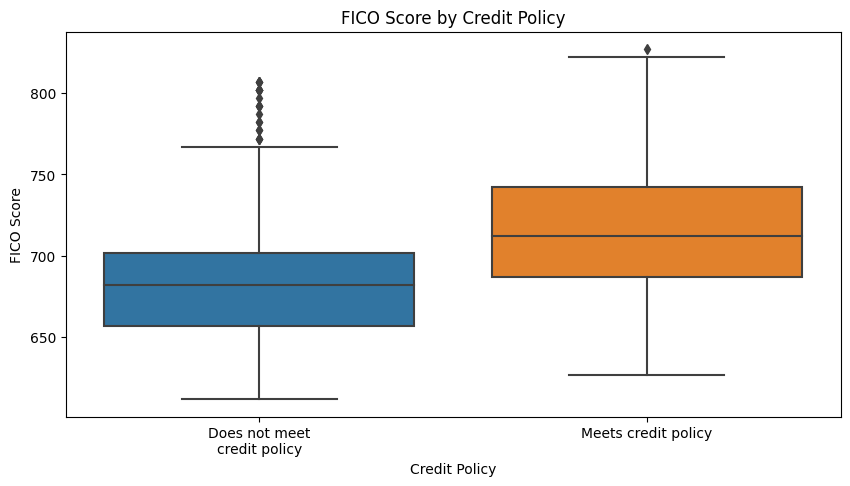

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='credit.policy', y='fico')
plt.title('FICO Score by Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('FICO Score')
plt.xticks([0, 1], ['Does not meet\ncredit policy', 'Meets credit policy'])

# Save the plot as a PNG image
plt.savefig('FICO_Score_by_Credit_Policy.png')

# Show the plot
plt.show()


In [ ]:
credit_policy_counts = df['credit.policy'].value_counts()
credit_policy_counts

1    7710
0    1868
Name: credit.policy, dtype: int64

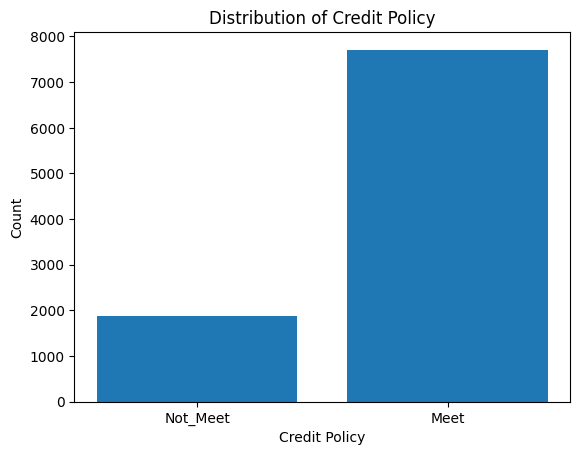

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Count the occurrences of each credit policy value
credit_policy_counts = df['credit.policy'].value_counts()

# Create the bar plot
plt.bar(credit_policy_counts.index, credit_policy_counts.values)

# Add labels and title
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.title('Distribution of Credit Policy')

# Customize x-axis labels if needed
plt.xticks(credit_policy_counts.index, ['Meet', 'Not_Meet'])

# Display the plot
plt.show()

# Save and download the figure
plt.savefig('distribution_of_creditpolicy.png')
files.download('distribution_of_creditpolicy.png')


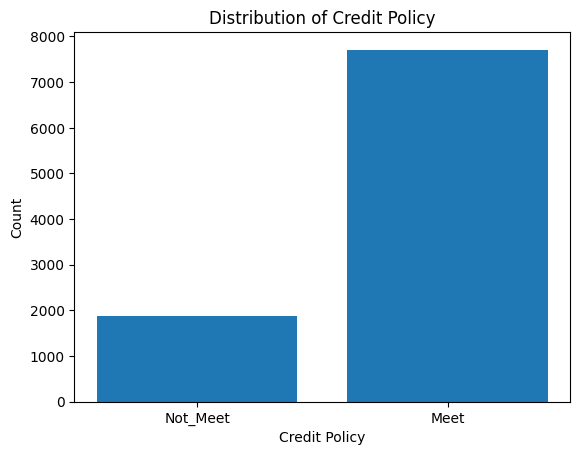

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each credit policy value
credit_policy_counts = df['credit.policy'].value_counts()

# Create the bar plot
plt.bar(credit_policy_counts.index, credit_policy_counts.values)

# Add labels and title
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.title('Distribution of Credit Policy')

# Customize x-axis labels if needed
plt.xticks(credit_policy_counts.index, ['Meet', 'Not_Meet'])

# Display the plot
plt.show()

# Save and download the figure
plt.savefig('distribution_of_creditpolicy.png')

# Download the saved figure in Google Colab
from google.colab import files
files.download('distribution_of_creditpolicy.png')


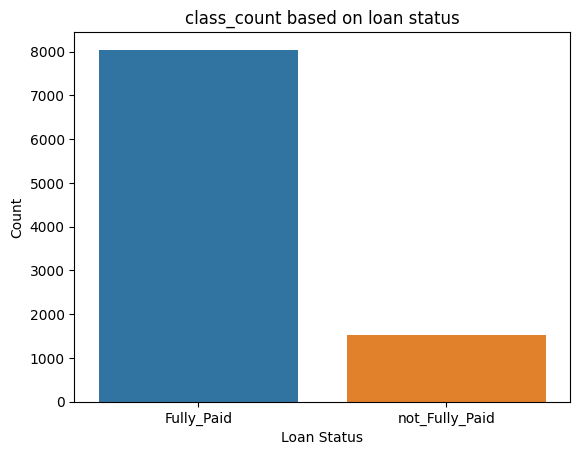

In [ ]:

sns.countplot(data=df,x='not.fully.paid')
plt.title('class_count based on loan status')
# Set x-label and y-label
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Setting custom x-axis labels
plt.xticks([0, 1], ['Fully_Paid', 'not_Fully_Paid'])

plt.savefig('df')  # Save the heatmap as an image file
plt.show()



In [ ]:
# unique values in purpose attribute

df.purpose.value_counts()


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

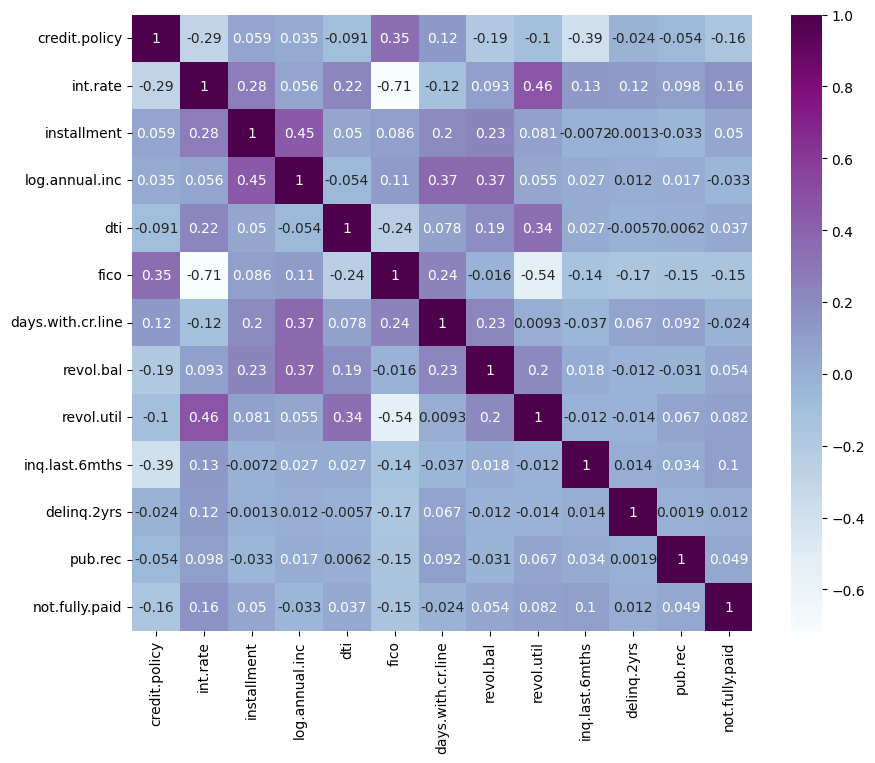

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='BuPu', annot=True)
plt.savefig('heatmap.png')  # Save the heatmap as an image file
plt.show()



## credit_policy,int_rate,fico,inq.last.6mths has high impact on **not_fully_paid**



In [4]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])


# LOGISTIC

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the dependent variable
y = df['not.fully.paid']
X = df.drop('not.fully.paid', axis=1)
X = pd.get_dummies(X)
# Add a constant column to the independent variables
X = sm.add_constant(X)

# Perform logistic regression
model = sm.Logit(y, X).fit()

# Get the significant variables
significant_vars = model.pvalues[model.pvalues < 0.05].index

# Print the summary of the model
print(model.summary())

# Make predictions on the training set
y_pred = model.predict(X) > 0.5

# Compute evaluation metrics for Logistic Regression
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(cm)
significant_vars

Optimization terminated successfully.
         Current function value: 0.411191
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not.fully.paid   No. Observations:                 9578
Model:                          Logit   Df Residuals:                     9559
Method:                           MLE   Df Model:                           18
Date:                Thu, 27 Jul 2023   Pseudo R-squ.:                 0.06496
Time:                        03:35:02   Log-Likelihood:                -3938.4
converged:                       True   LL-Null:                       -4212.0
Covariance Type:            nonrobust   LLR p-value:                1.173e-104
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          7.2391   4.44e+06   1.63e-06      1.000   -8.

Index(['credit.policy', 'installment', 'log.annual.inc', 'fico', 'revol.bal',
       'inq.last.6mths', 'pub.rec'],
      dtype='object')

In [ ]:
significant_vars = ['credit.policy', 'installment', 'log.annual.inc', 'fico', 'revol.bal', 'inq.last.6mths', 'pub.rec']

# Filter the dataset to include only the significant variables
sig = df[significant_vars]

# Balancing data with **SMOTE** **method**

In [8]:
# Splitting into X (features) and Y (target)
X1 = df.drop("not.fully.paid", axis=1)
X1 = pd.get_dummies(X1)
Y=df['not.fully.paid']
# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X1.shape)
print("Shape of Y:", Y.shape)

Shape of X: (9578, 13)
Shape of Y: (9578,)


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X1,Y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 9578
Resampled dataset shape 16090


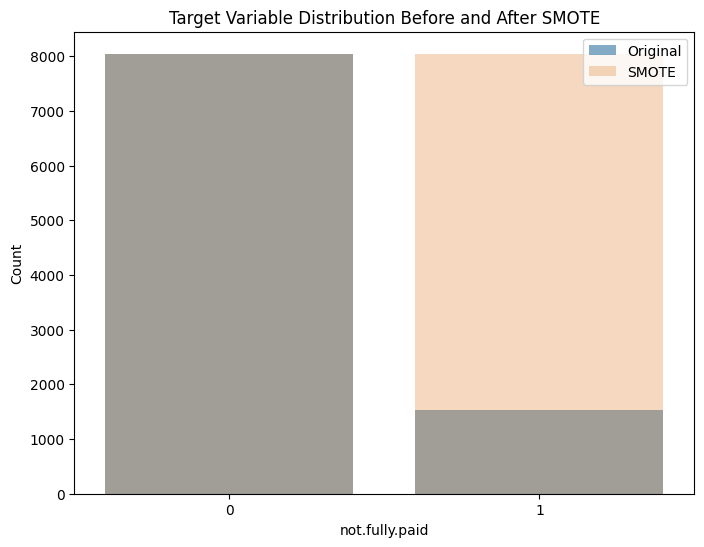

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the original target variable
original_counts = df['not.fully.paid'].value_counts()

# Count the occurrences of each class in the target variable after SMOTE
smote_counts = y_smote.value_counts()

# Create a custom color palette
custom_palette = sns.color_palette(['#1f77b4', '#ff7f0e'])

# Create the bar chart with the custom colors for each class
plt.figure(figsize=(8, 6))
sns.barplot(x=original_counts.index, y=original_counts.values, alpha=0.6, color=custom_palette[0], label='Original')
sns.barplot(x=smote_counts.index, y=smote_counts.values, alpha=0.3, color=custom_palette[1], label='SMOTE')
plt.title('Target Variable Distribution Before and After SMOTE')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')
plt.legend()

# Save the figure as an image file
plt.savefig('target_variable_distribution.png')

# Display the plot
plt.show()


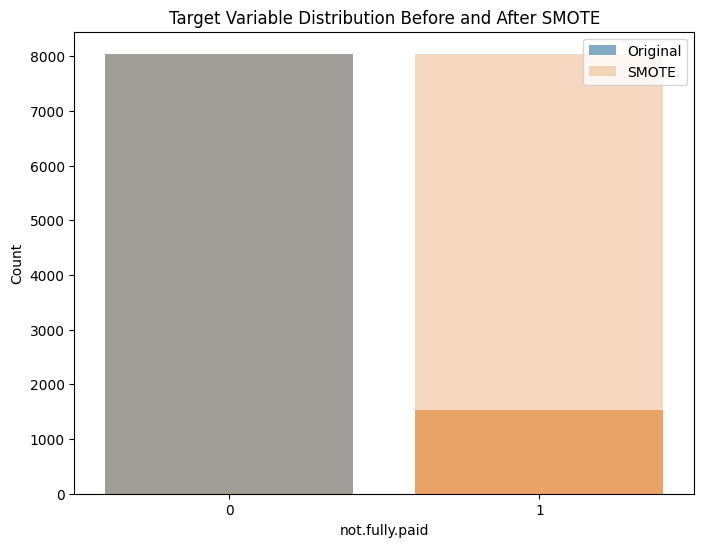

In [11]:

# Count the occurrences of each class in the original target variable
original_counts = df['not.fully.paid'].value_counts()

# Count the occurrences of each class in the target variable after SMOTE
smote_counts = y_smote.value_counts()

# Create a bar chart to compare the counts before and after SMOTE
plt.figure(figsize=(8, 6))
sns.barplot(x=original_counts.index, y=original_counts.values, alpha=0.6, label='Original')
sns.barplot(x=smote_counts.index, y=smote_counts.values, alpha=0.3,color=custom_palette[1],label='SMOTE')
plt.title('Target Variable Distribution Before and After SMOTE')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')
plt.legend()
plt.show()


# Train-test split

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)



# **SVM**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import LinearSVC

# Create a Linear SVM classifier
svm_model = LinearSVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_pred = svm_model.predict(X_test)

# Compute evaluation metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

print("Linear SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Confusion Matrix:")
print(svm_cm)


Linear SVM Metrics:
Accuracy: 0.5059042883778745
Precision: 0.5022054190296156
Recall: 0.9937655860349127
F1-score: 0.6672247802427793
Confusion Matrix:
[[  34 1580]
 [  10 1594]]


# **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt_classifier = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)


# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7402113113735239
Precision: 0.8490909090909091
Recall: 0.5822942643391521
F1-score: 0.6908284023668639
Confusion Matrix:
[[1448  166]
 [ 670  934]]


In [ ]:
# Plot the decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10, 8))

dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

# Visualize the decision tree using Graphviz
import graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree_3")  # Save the rendered decision tree as a PDF or image file
graph.view()

<Figure size 1000x800 with 0 Axes>

'decision_tree_3.pdf'

# **Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier



# Bagging
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_pred = bagging_classifier.predict(X_test)

# Compute evaluation metrics for Bagging
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred)
bagging_recall = recall_score(y_test, bagging_pred)
bagging_f1 = f1_score(y_test, bagging_pred)
bagging_cm = confusion_matrix(y_test, bagging_pred)

print("Bagging Metrics:")
print("Accuracy:", bagging_accuracy)
print("Precision:", bagging_precision)
print("Recall:", bagging_recall)
print("F1-score:", bagging_f1)
print("Confusion Matrix:")
print(bagging_cm)

Bagging Metrics:
Accuracy: 0.8741454319453077
Precision: 0.9120274914089347
Recall: 0.8273067331670823
F1-score: 0.867603792088918
Confusion Matrix:
[[1486  128]
 [ 277 1327]]


# **AdaBoosting**

In [ ]:
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_pred = adaboost_classifier.predict(X_test)

# Compute evaluation metrics for AdaBoost
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred)
adaboost_recall = recall_score(y_test, adaboost_pred)
adaboost_f1 = f1_score(y_test, adaboost_pred)
adaboost_cm = confusion_matrix(y_test, adaboost_pred)

print("AdaBoost Metrics:")
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1-score:", adaboost_f1)
print("Confusion Matrix:")
print(adaboost_cm)

AdaBoost Metrics:
Accuracy: 0.8300186451211933
Precision: 0.8170365926814637
Recall: 0.8491271820448878
F1-score: 0.8327728523387343
Confusion Matrix:
[[1309  305]
 [ 242 1362]]


## **Random forest classifier**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Compute evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Confusion Matrix:")
print(rf_cm)


Random Forest Metrics:
Accuracy: 0.896519577377253
Precision: 0.9343814080656186
Recall: 0.8522443890274314
F1-score: 0.8914248451255298
Confusion Matrix:
[[1518   96]
 [ 237 1367]]


## LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=5)
logreg_classifier.fit(X_train, y_train)
logreg_pred = logreg_classifier.predict(X_test)

# Compute evaluation metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_cm = confusion_matrix(y_test, logreg_pred)
logreg_probabilities = logreg_classifier.predict_proba(X_test)
log_odds = logreg_probabilities[:, 1]

print("Logistic Regression Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)
print("Confusion Matrix:")


Logistic Regression Metrics:
Accuracy: 0.5910503418272218
Precision: 0.5895522388059702
Recall: 0.5910224438902744
F1-score: 0.5902864259028644
Confusion Matrix:


# **KNN Clasiification**

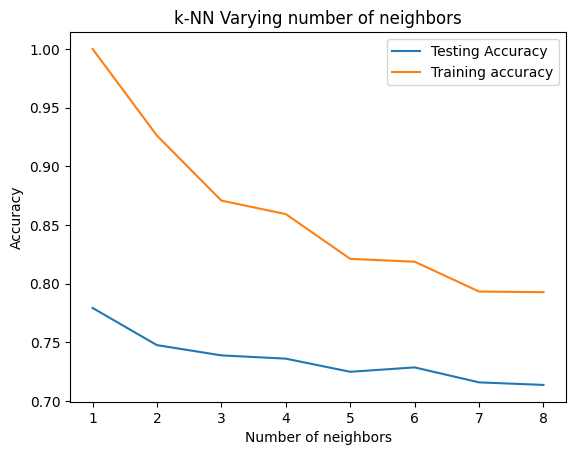

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()






In [ ]:
## Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
KNN_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

# Compute evaluation metrics for KNN
KNN_accuracy = accuracy_score(y_test, KNN_pred)
KNN_precision = precision_score(y_test, KNN_pred)
KNN_recall = recall_score(y_test, KNN_pred)
KNN_f1 = f1_score(y_test, KNN_pred)
KNN_cm = confusion_matrix(y_test, KNN_pred)

print("Random Forest Metrics:")
print("Accuracy:", KNN_accuracy)
print("Precision:", KNN_precision)
print("Recall:", KNN_recall)
print("F1-score:", KNN_f1)
print("Confusion Matrix:")
print(KNN_cm)

Random Forest Metrics:
Accuracy: 0.7793660658794282
Precision: 0.7370095440084835
Recall: 0.8665835411471322
F1-score: 0.7965616045845272
Confusion Matrix:
[[1118  496]
 [ 214 1390]]


# **ANN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import binary_accuracy

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the ANN model (same as before)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[binary_accuracy])
model.fit(X_train_scaled, y_train, batch_size=64, epochs=10, verbose=1)
# Compute predicted probabilities for ANN
ann_prob = model.predict(X_test_scaled).ravel()

# Compute FPR and TPR for ANN
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_prob)

# Compute AUC for ANN
ann_auc = auc(ann_fpr, ann_tpr)



Epoch 1/10
202/202 [==============================] - 3s 6ms/step - loss: 0.6268 - binary_accuracy: 0.6441
Epoch 2/10
202/202 [==============================] - 1s 6ms/step - loss: 0.5949 - binary_accuracy: 0.6734
Epoch 3/10
202/202 [==============================] - 1s 5ms/step - loss: 0.5876 - binary_accuracy: 0.6795
Epoch 4/10
202/202 [==============================] - 1s 5ms/step - loss: 0.5836 - binary_accuracy: 0.6838
Epoch 5/10
202/202 [==============================] - 1s 5ms/step - loss: 0.5805 - binary_accuracy: 0.6847
Epoch 6/10
202/202 [==============================] - 1s 4ms/step - loss: 0.5782 - binary_accuracy: 0.6865
Epoch 7/10
202/202 [==============================] - 1s 4ms/step - loss: 0.5770 - binary_accuracy: 0.6889
Epoch 8/10
202/202 [==============================] - 1s 5ms/step - loss: 0.5760 - binary_accuracy: 0.6884
Epoch 9/10
202/202 [==============================] - 1s 5ms/step - loss: 0.5746 - binary_accuracy: 0.6893
Epoch 10/10
101/101 [================

# **NB**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'X' contains your feature variables and 'y' contains your target variable
# Split your data into training and testing sets if not done already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but recommended for some datasets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier to the training data
naive_bayes_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
nb_pred = naive_bayes_classifier.predict(X_test_scaled)

# Compute evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)
print("Confusion Matrix:")
print(nb_cm)
# Compute predicted probabilities for Naive Bayes
nb_prob = naive_bayes_classifier.predict_proba(X_test_scaled)[:, 1]

# Compute FPR and TPR for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)

# Compute AUC for Naive Bayes
nb_auc = auc(nb_fpr, nb_tpr)


Naive Bayes Metrics:
Accuracy: 0.7489561586638831
Precision: 0.28
Recall: 0.36721311475409835
F1-score: 0.3177304964539007
Confusion Matrix:
[[1323  288]
 [ 193  112]]


# **ROC**

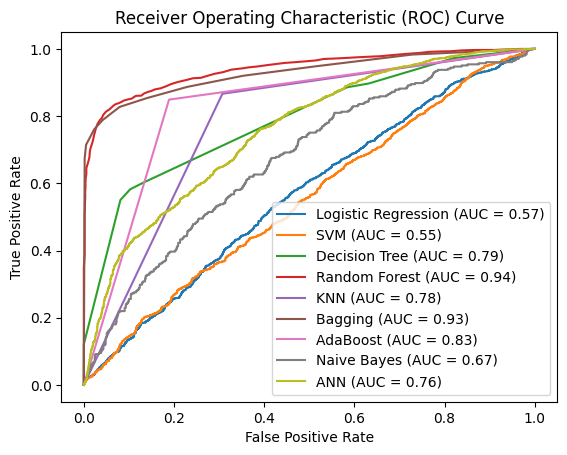

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities or confidence scores for each classifier
logreg_prob = logreg_classifier.predict_proba(X_test)[:, 1]
svm_scores = svm_model.decision_function(X_test)
dt_scores = dt_classifier.predict_proba(X_test)[:, 1]
rf_prob = rf_classifier.predict_proba(X_test)[:, 1]
knn_prob = knn.predict_proba(X_test)[:, 1]
bagging_prob = bagging_classifier.predict_proba(X_test)[:, 1]
adaboost_prob = adaboost_classifier.predict_proba(X_test)[:, 1]

# Compute FPR and TPR for each classifier
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_scores)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_scores)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_prob)
bagging_fpr, bagging_tpr, _ = roc_curve(y_test, bagging_prob)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_prob)

# Compute AUC for each classifier
logreg_auc = auc(logreg_fpr, logreg_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
bagging_auc = auc(bagging_fpr, bagging_tpr)
adaboost_auc = auc(adaboost_fpr, adaboost_tpr)

# Plot ROC curves
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(bagging_fpr, bagging_tpr, label='Bagging (AUC = {:.2f})'.format(bagging_auc))
plt.plot(adaboost_fpr, adaboost_tpr, label='AdaBoost (AUC = {:.2f})'.format(adaboost_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(ann_fpr, ann_tpr, label='ANN (AUC = {:.2f})'.format(ann_auc))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()
